In [ ]:
import os
from IPython.display import display, Image

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Confirm current working directory
os.chdir('/content/drive/MyDrive/Pavement_dist')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Pavement_dist'

In [ ]:
# Install relevant libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 7.7 MB/s eta 0:00:00


## Download the dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YnkV0Qge4u03wYTKFjx2")
project = rf.workspace("pavement-distresses-detection").project("asphalt-road-pavement-distresses-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.170, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Asphalt-Road-Pavement-Distresses-Detection-2 in yolov8:: 100%|██████████| 1103/1103 [00:08<00:00, 125.51it/s]


In [ ]:
!yolo settings datasets_dir='/content/drive/MyDrive/Pavement-distresses/Asphalt-Road-Pavement-Distresses-Detection-2'


💡 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing '/root/.config/Ultralytics/settings.yaml'

settings_version: 0.0.4
datasets_dir: /content/drive/MyDrive/Pavement-distresses/Asphalt-Road-Pavement-Distresses-Detection-2
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



In [ ]:
!nvidia-smi

Mon Sep  4 15:10:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Train the model

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/Pavement-distresses/Asphalt-Road-Pavement-Distresses-Detection-2/data.yaml imgsz=640 epochs=100 project = large_model name=img_mixup_copy_paste_degrees mixup=0.5 copy_paste=0.5 degrees=45 close_mosaic=0

100% 83.7M/83.7M [00:01<00:00, 51.1MB/s]
Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Pavement-distresses/Asphalt-Road-Pavement-Distresses-Detection-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=large_model, name=img_mixup_copy_paste_degrees, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width

## Validation


In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/train/model_5_best.pt data=/content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/data.yaml name=model_5_conf_40_aug conf=0.40 mixup=0.7 degrees=-45

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100% 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.08it/s]
                   all        110        320       0.64      0.512       0.58      0.413
    alligator_cracking        110         85      0.764      0.494      0.652       0.44
 longitudinal_cracking        110         41      0.484      0.366      0.416      0.232
               pothole        110         39      0.919      0.872      0.926      0.789
             ravelling        110        155      0.395      0.316      0.324      0.192
Speed: 4.7ms preprocess, 21.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Result

In [ ]:
!rm -rf /content/drive/MyDrive/Pavement-distresses/runs/detect/epochs_100

In [ ]:
!ls runs/detect/epochs100_smoothing_0.5

args.yaml					     train_batch1.jpg
confusion_matrix_normalized.png			     train_batch2520.jpg
confusion_matrix.png				     train_batch2521.jpg
events.out.tfevents.1691162330.442ea977cf9d.12125.0  train_batch2522.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


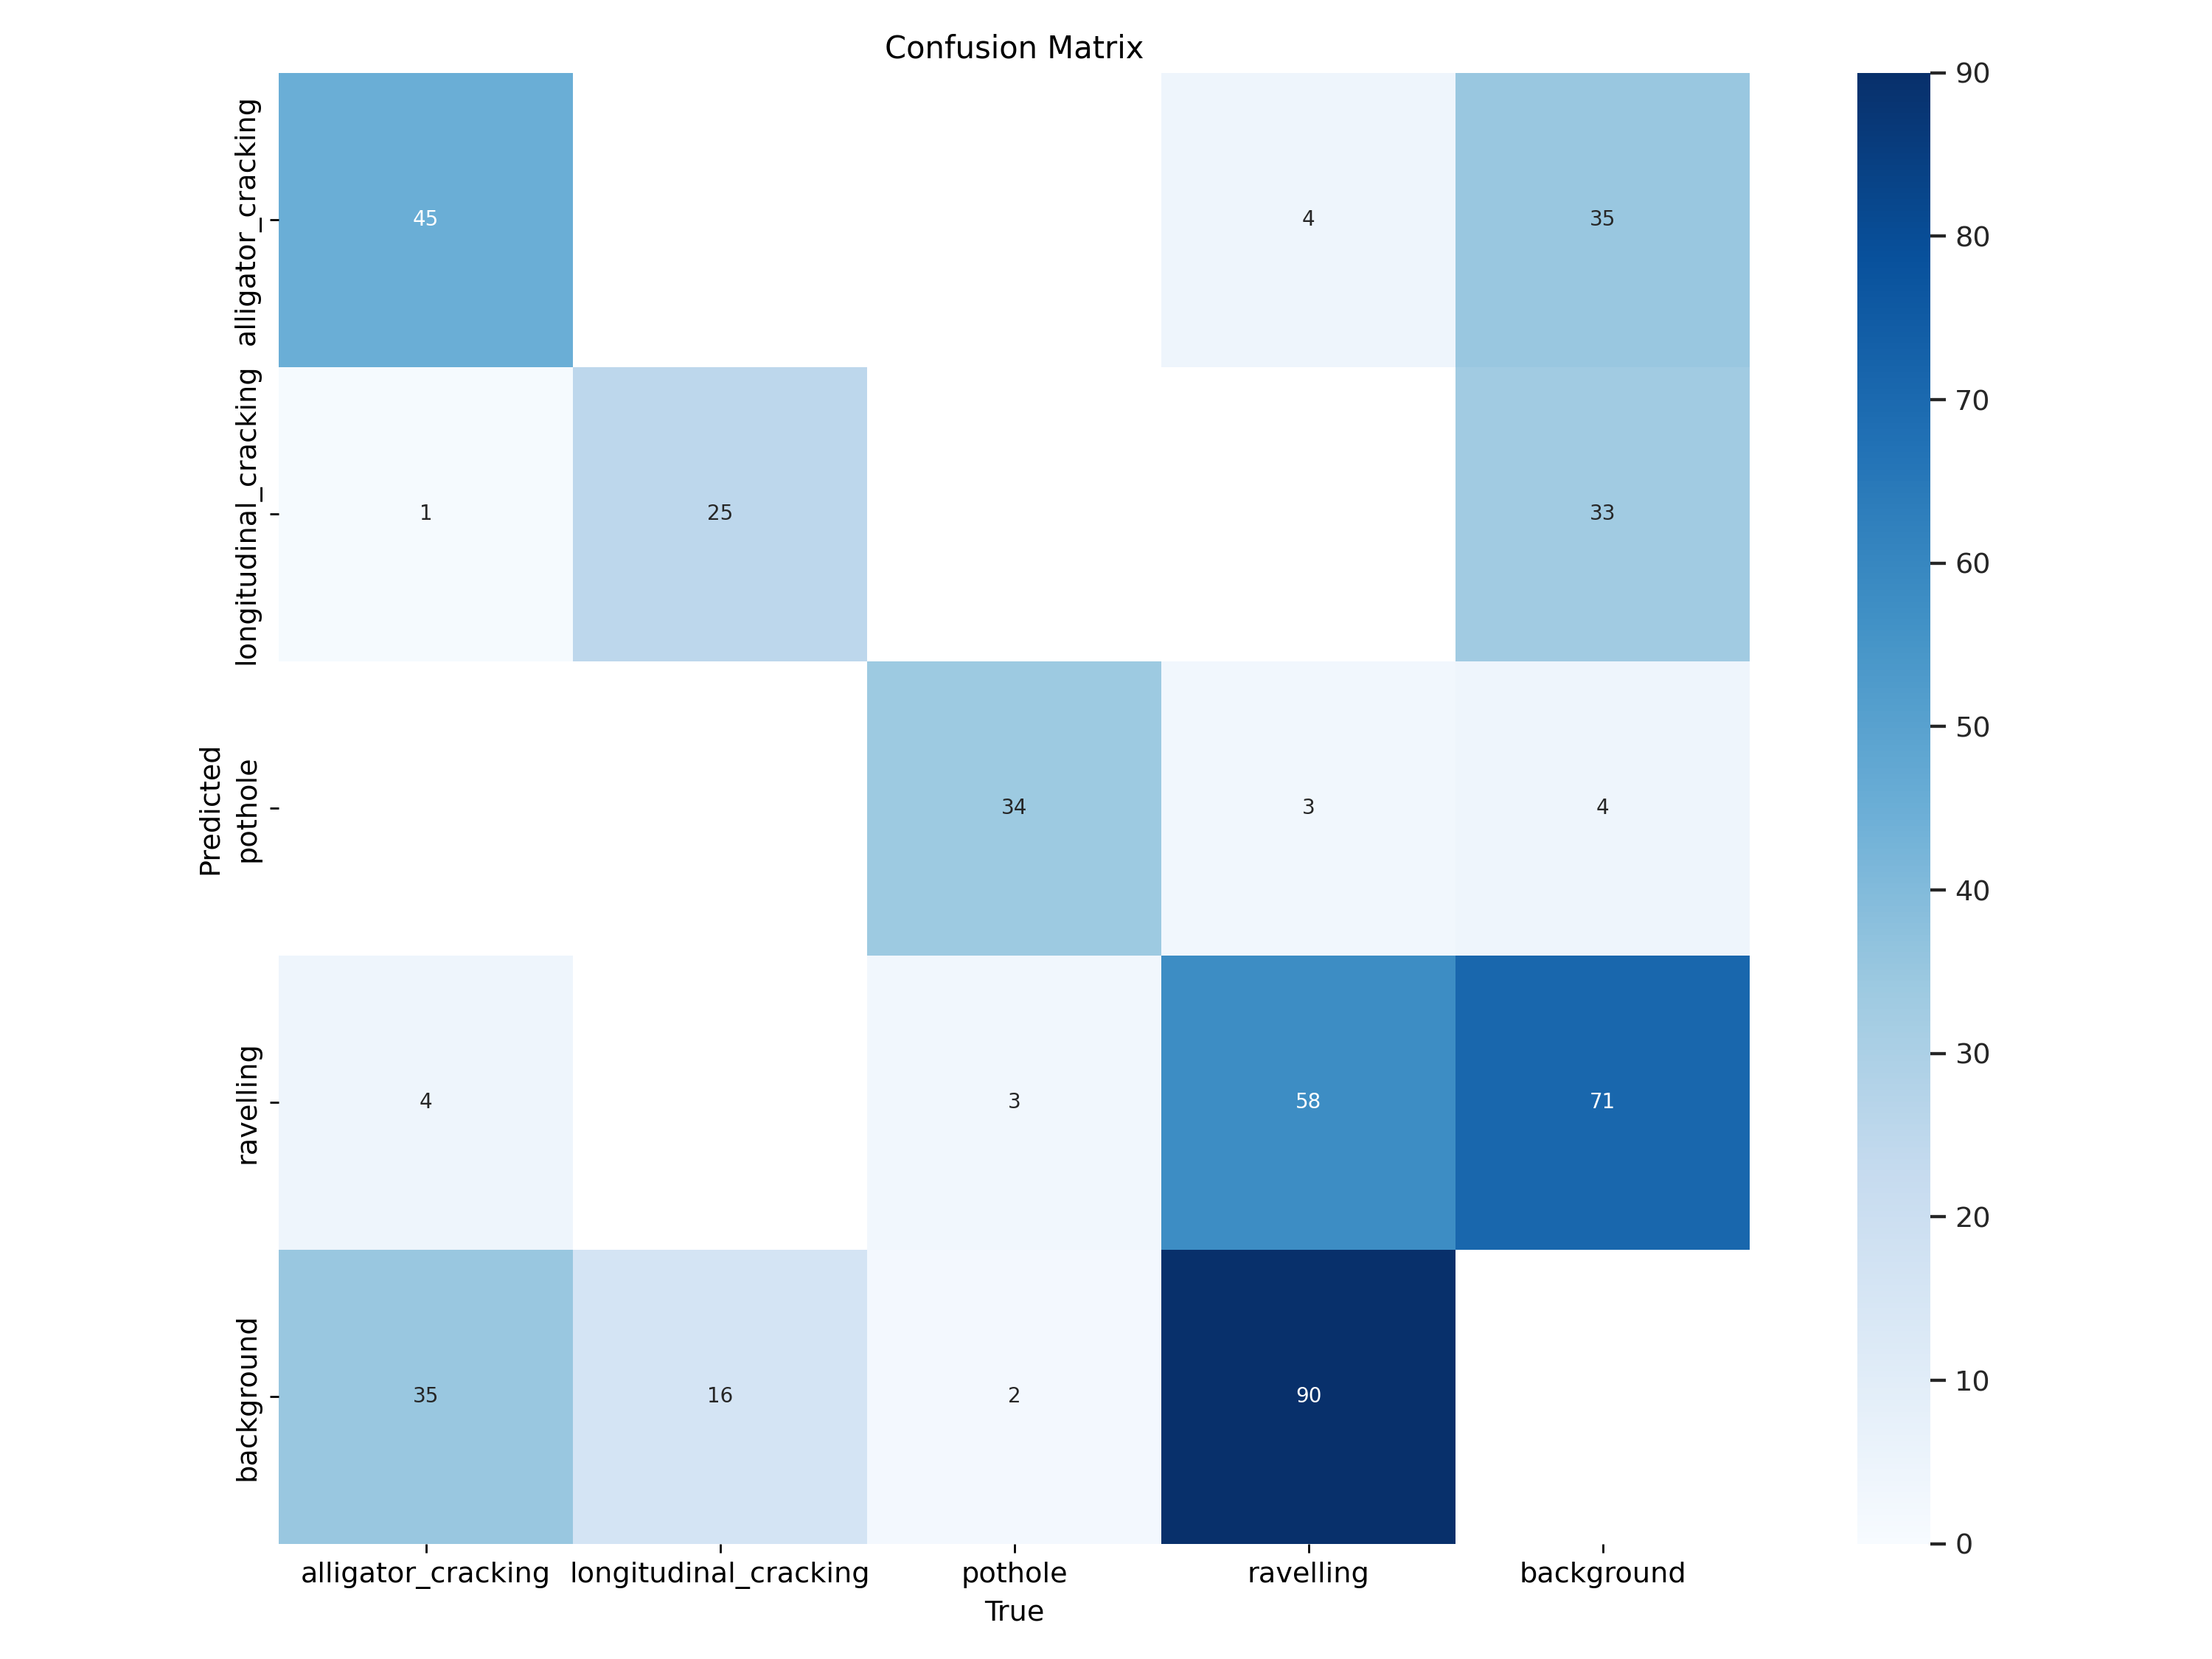

In [ ]:
Image(filename='runs/detect/epochs100_smoothing_0.5/confusion_matrix.png', width=600)

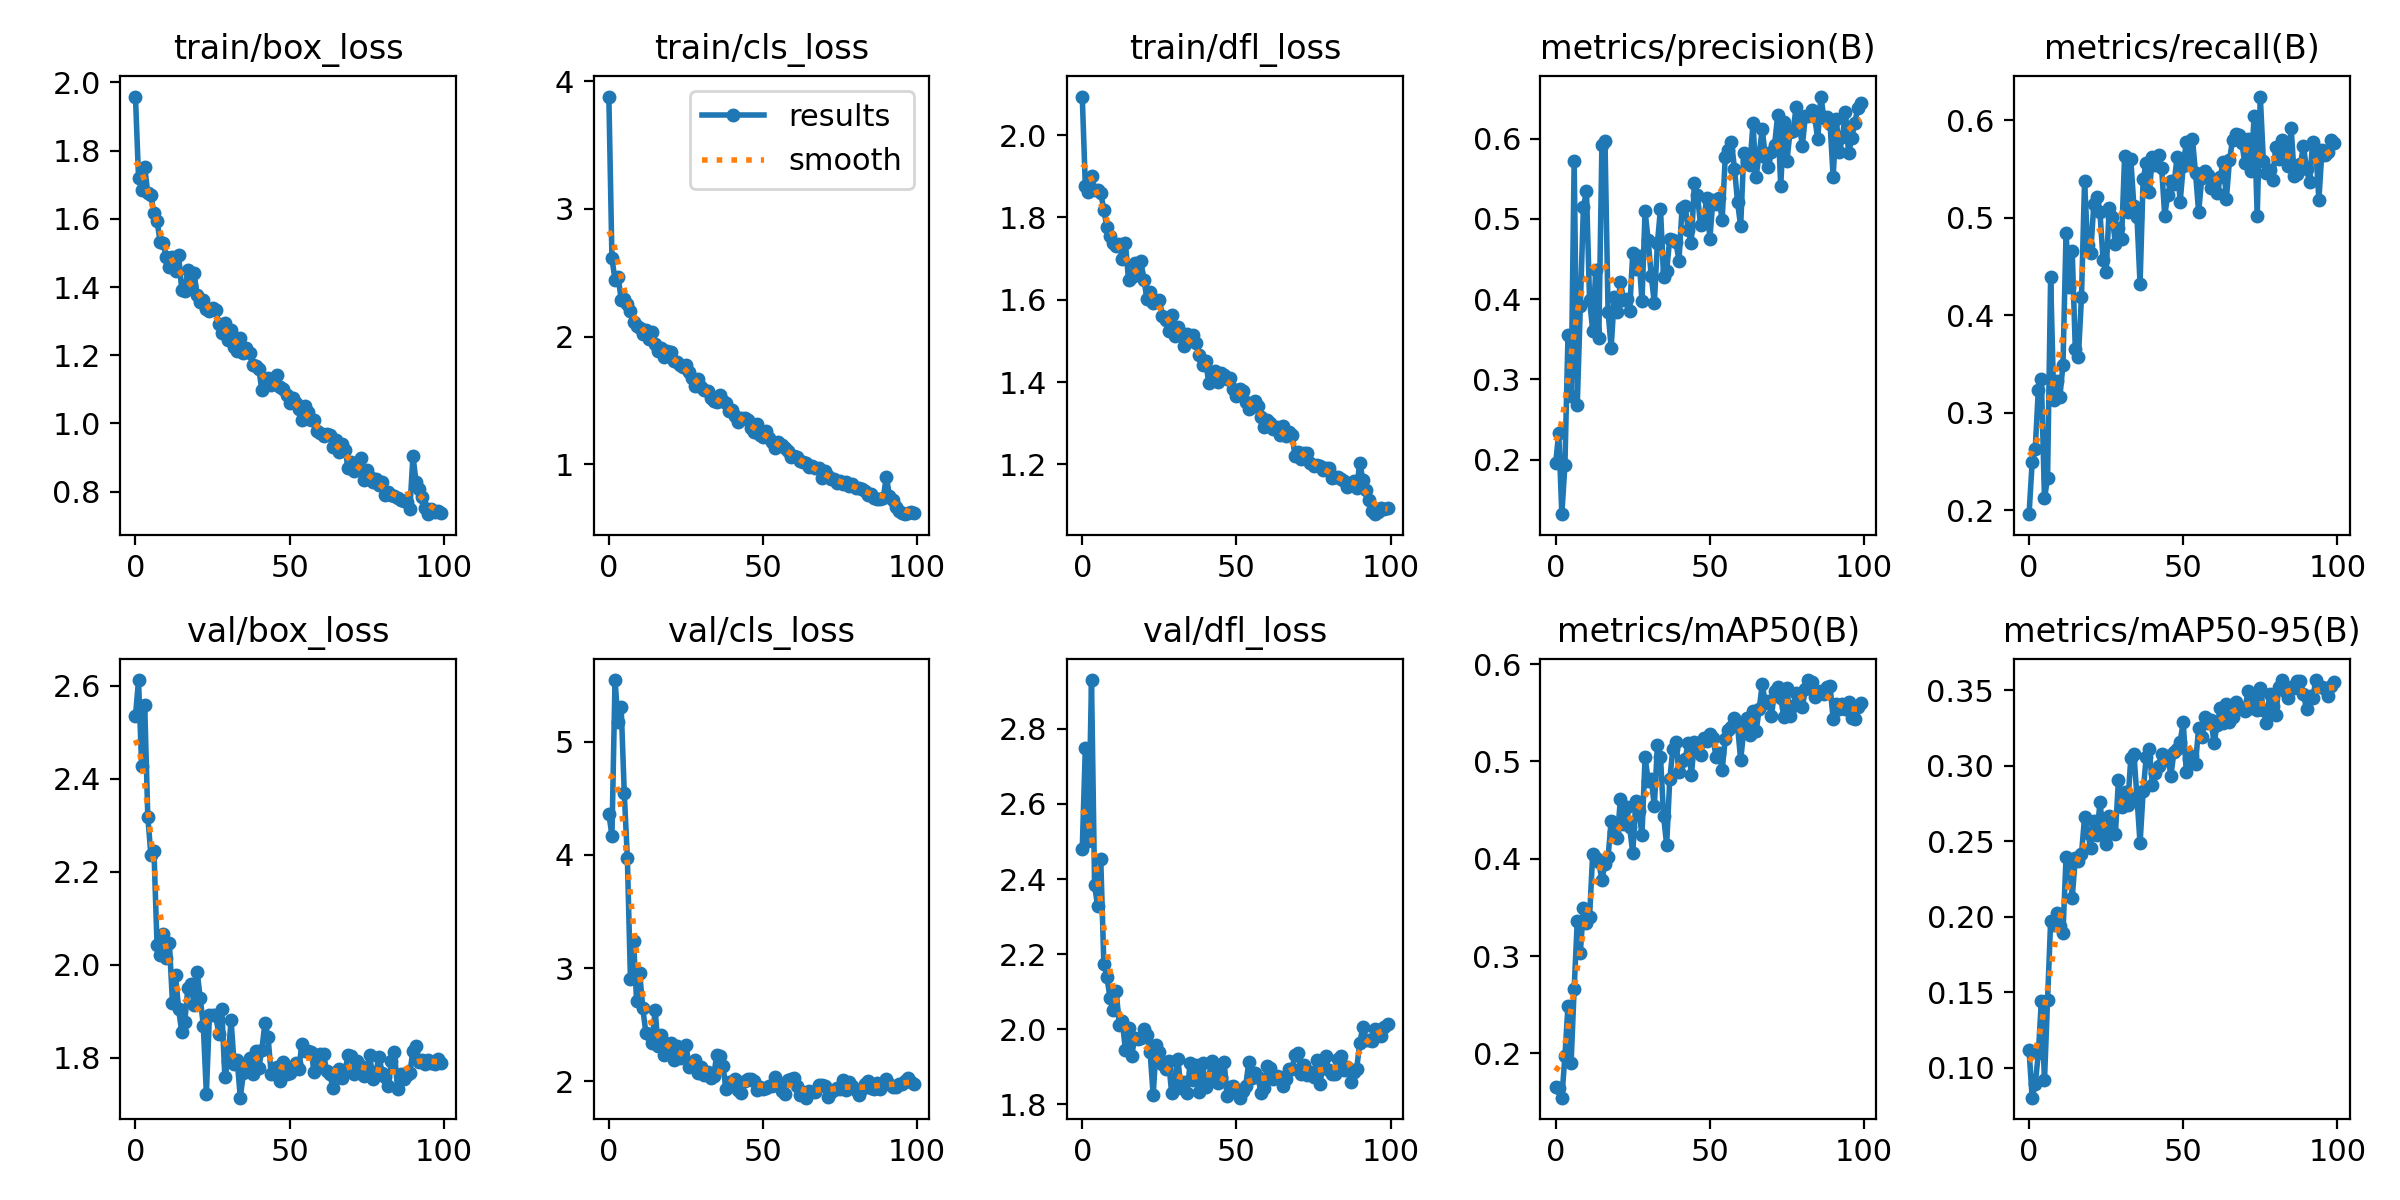

In [ ]:
Image(filename=f'runs/detect/epochs100_smoothing_0.5/results.png', width=600)

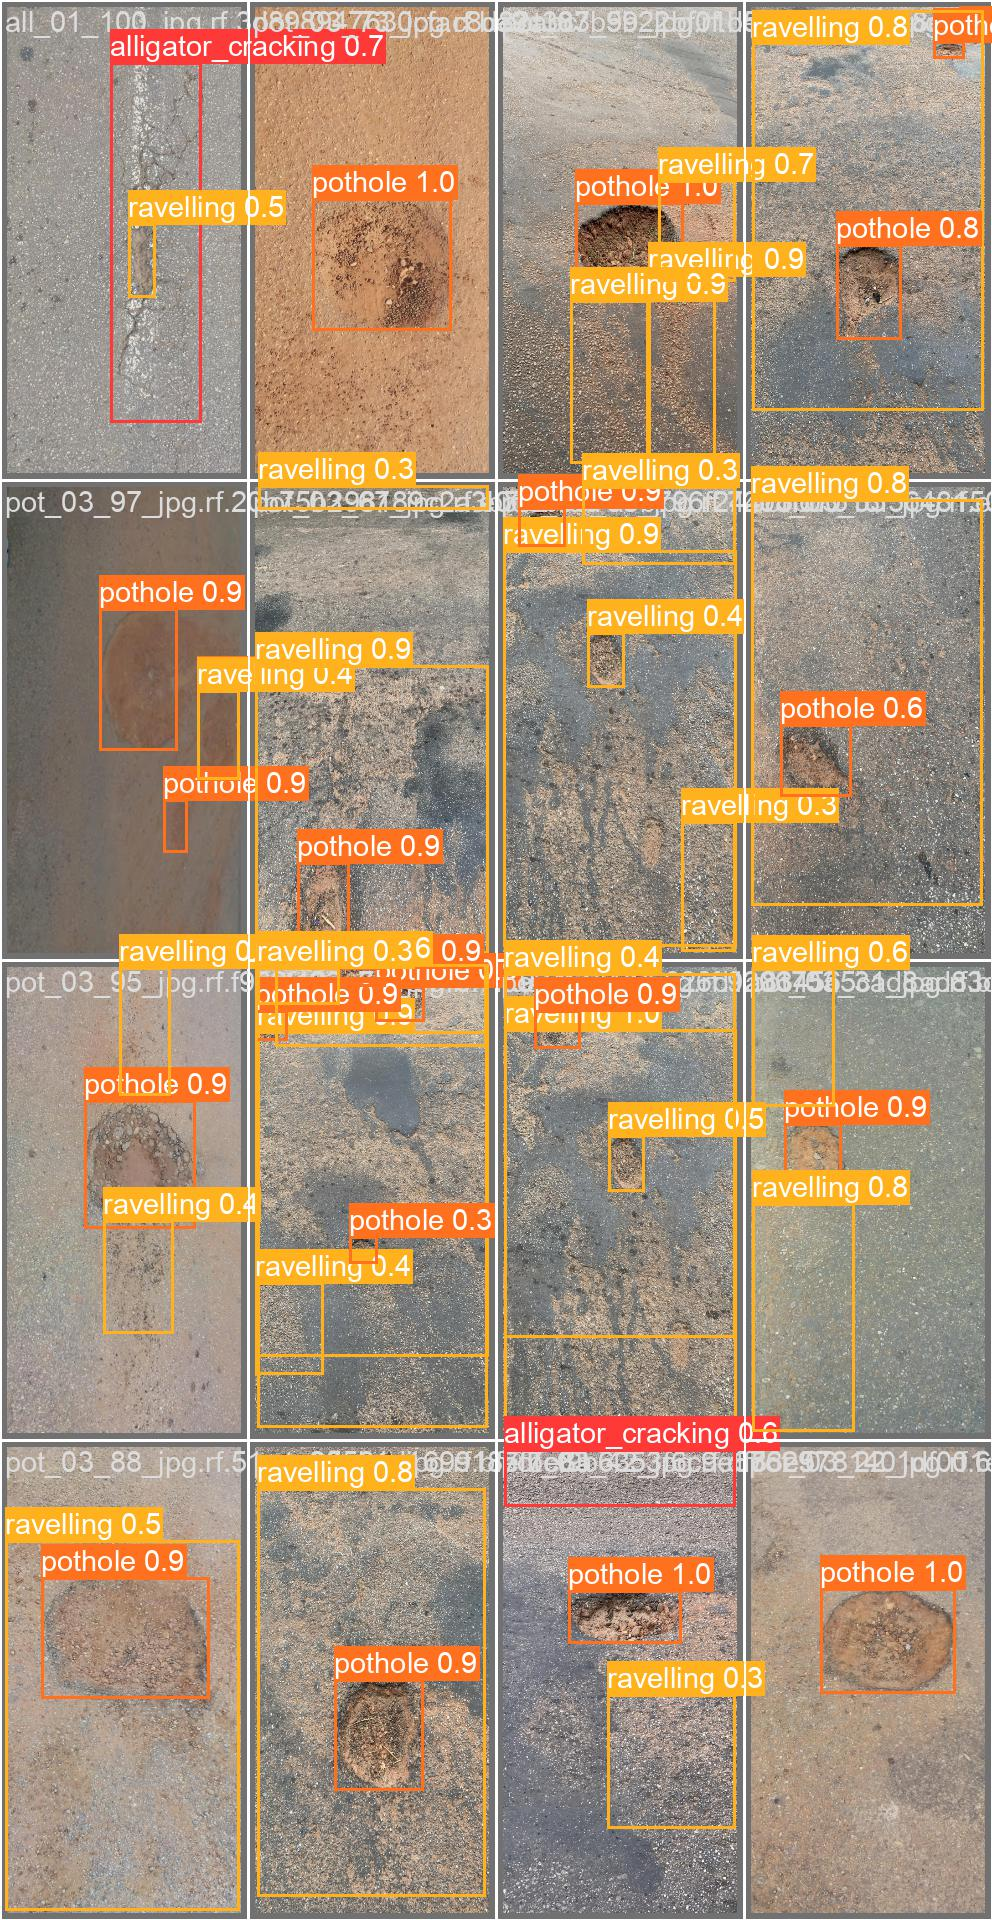

In [ ]:
Image(filename='runs/detect/epochs100_smoothing_0.5/val_batch0_pred.jpg', width=600)

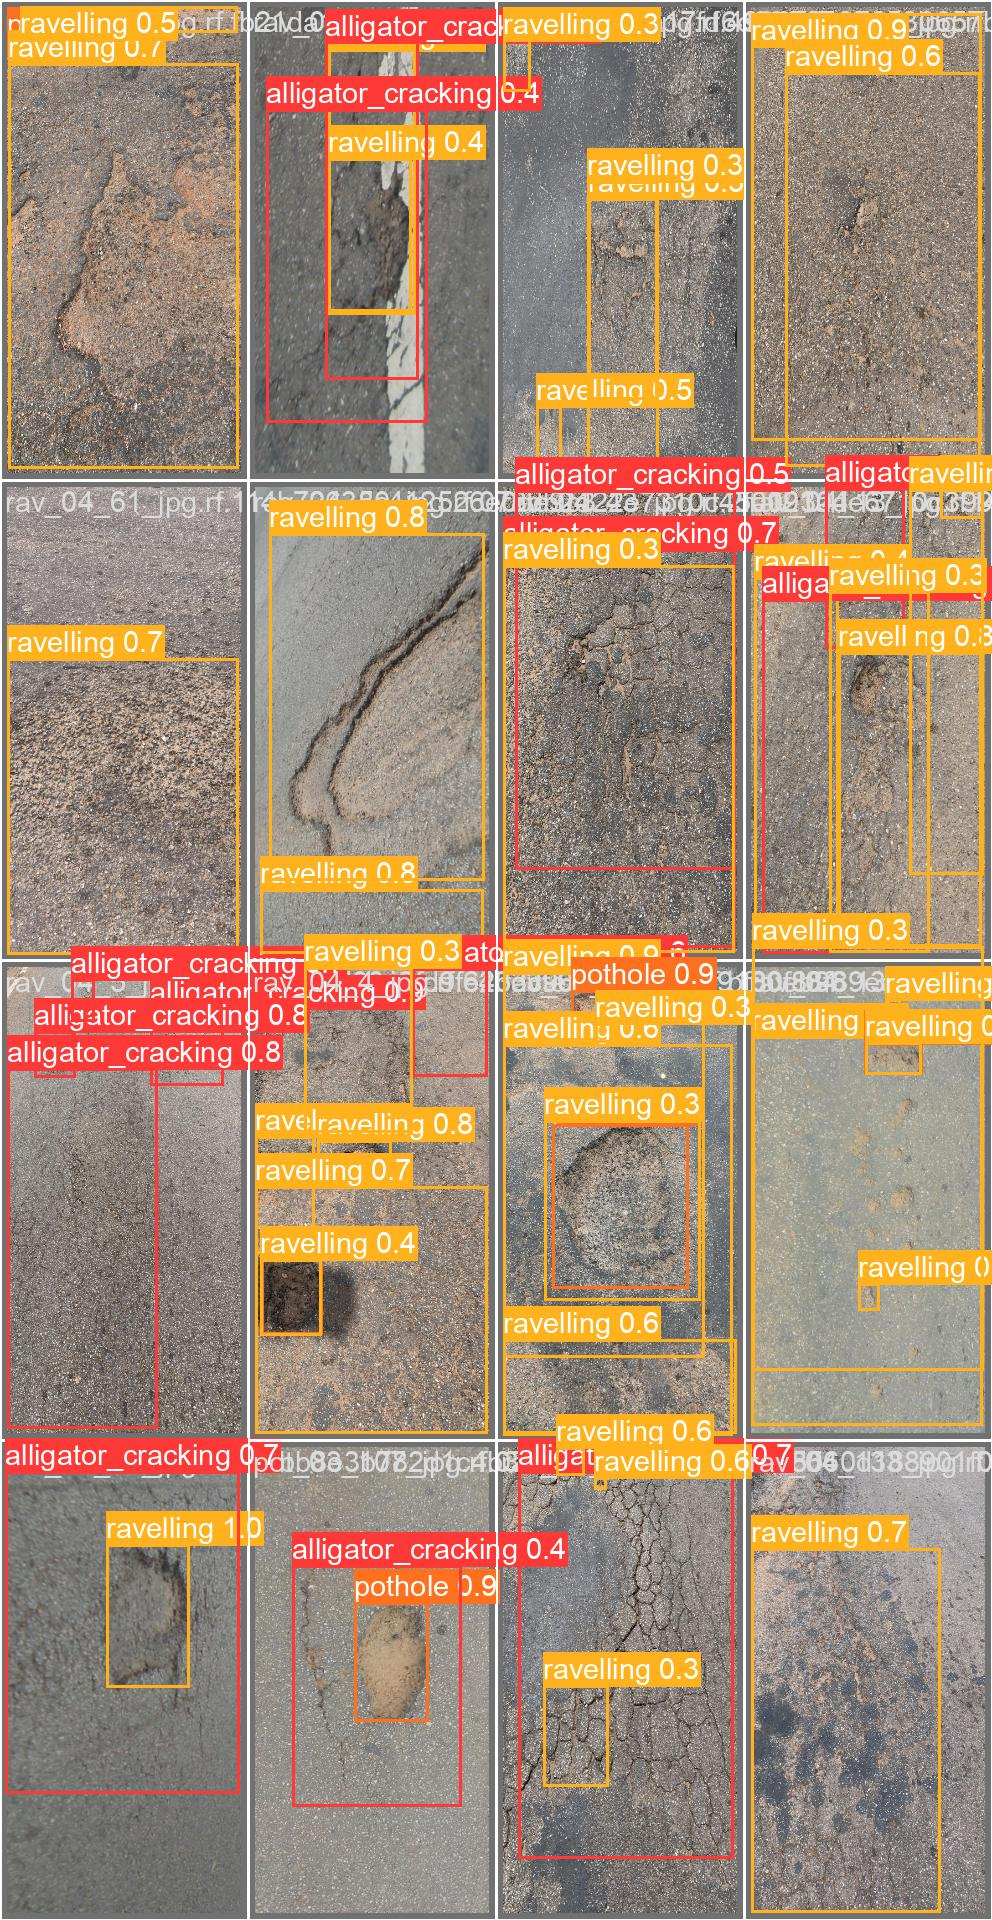

In [ ]:
Image(filename='runs/detect/epochs100_smoothing_0.5/val_batch1_pred.jpg', width=600)

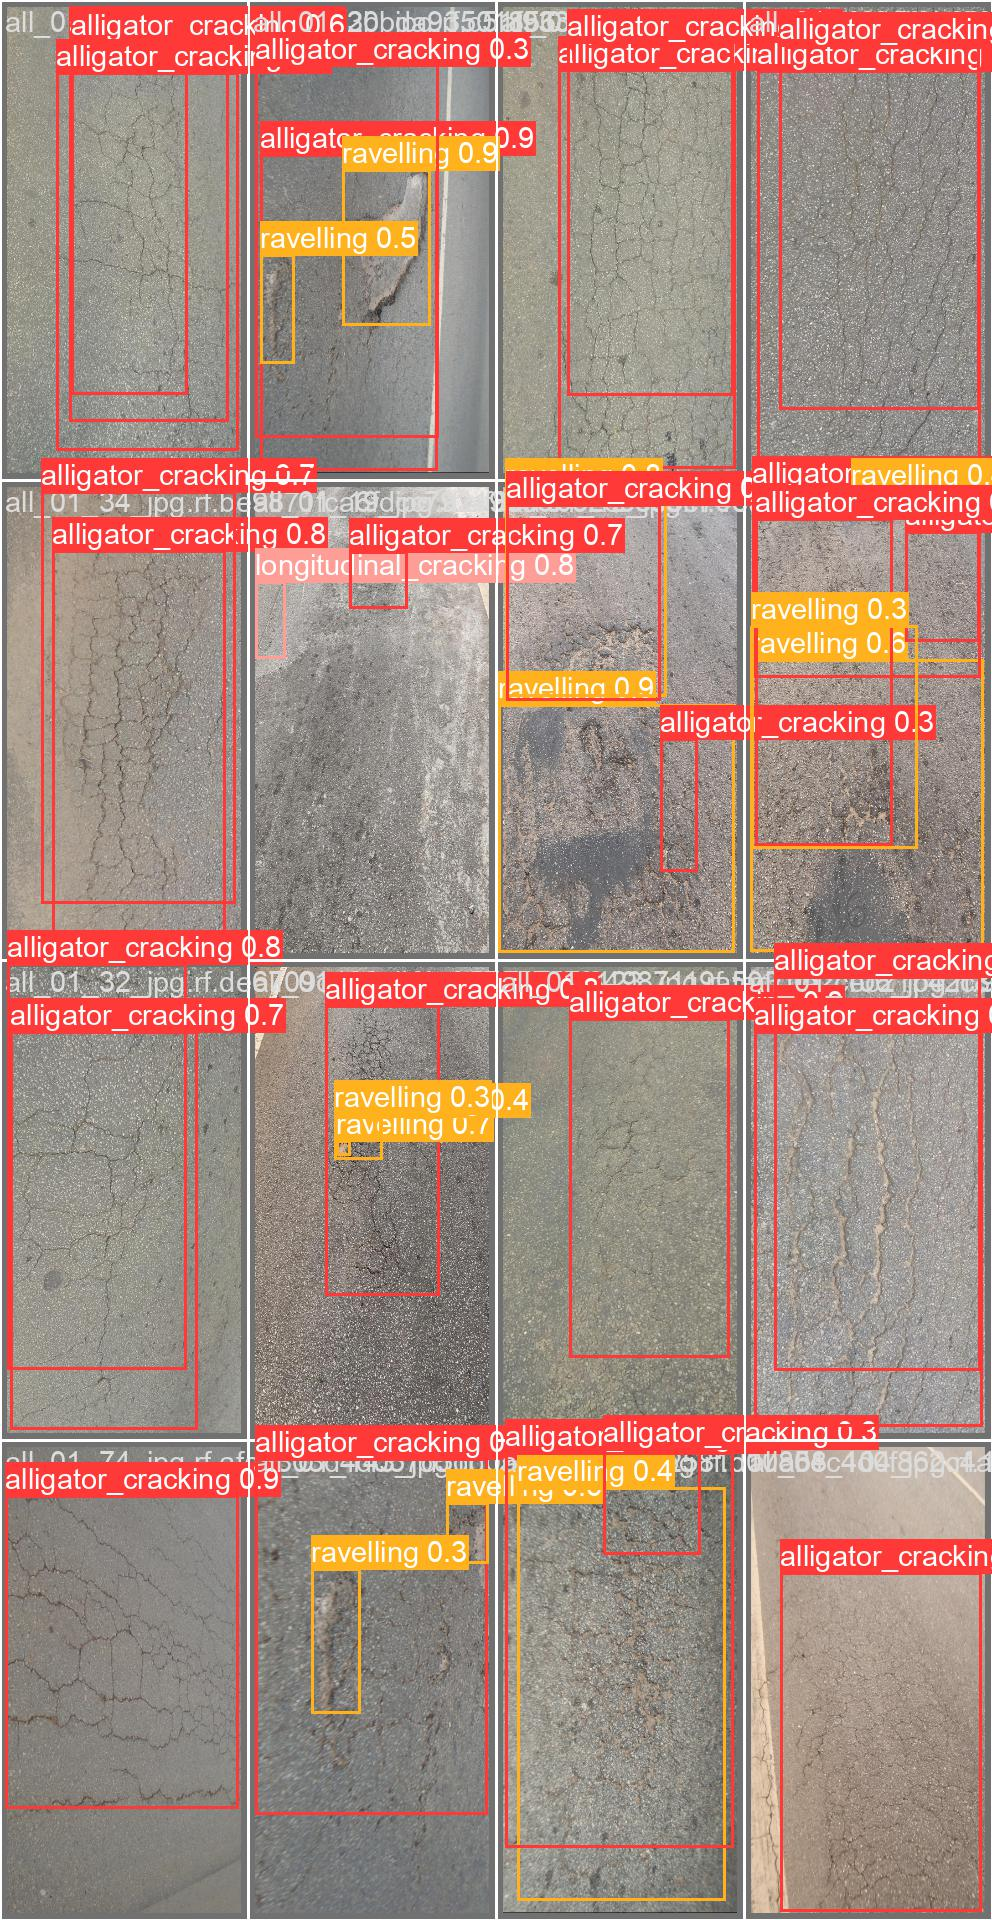

In [ ]:
Image(filename='runs/detect/epochs100_smoothing_0.5/val_batch2_pred.jpg', width=600)

In [ ]:
from posix import readv
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model_path = '/content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/train/best.pt'

model = YOLO(model_path)
paths = os.listdir(r'/content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/test')
pot_path = '/content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/test/road-potholes-potholes-in-a-roadway-in-poland-stock-photograph_csp0485339.jpg'


# Run inference on 'pot_34.PNG' with arguments
model.predict(pot_path, save=True)


image 1/1 /content/drive/MyDrive/Pavement_dist/Asphalt-Road-Pavement-Distresses-Detection-2/test/road-potholes-potholes-in-a-roadway-in-poland-stock-photograph_csp0485339.jpg: 512x640 (no detections), 72.0ms
Speed: 2.6ms preprocess, 72.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict34


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'alligator_cracking', 1: 'longitudinal_cracking', 2: 'pothole', 3: 'ravelling'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  7,  48,  33],
         [ 71, 107,  95],
         [ 57,  95,  83]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 44,  89,  73],
         [ 39,  82,  69],
         [  2,  23,  14]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 54,  65,  55],
         [  0,  16,   5],
         [ 66, 109,  94]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],

In [ ]:
import cv2
import matplotlib.pyplot as plt
all= cv2.imread(all_path)
all_resize = cv2.resize(all, (500, 600))

In [ ]:
all_image = cv2.cvtColor(all_resize, cv2.COLOR_BGR2RGB)
all_image

array([[[ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55],
        ...,
        [153, 154, 148],
        [156, 157, 151],
        [147, 148, 142]],

       [[ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55],
        ...,
        [146, 147, 141],
        [152, 153, 147],
        [153, 154, 148]],

       [[ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55],
        ...,
        [142, 140, 136],
        [138, 137, 132],
        [137, 136, 131]],

       ...,

       [[137, 135, 138],
        [138, 136, 139],
        [132, 130, 133],
        ...,
        [164, 151, 145],
        [157, 144, 138],
        [150, 137, 131]],

       [[133, 131, 136],
        [138, 136, 140],
        [136, 134, 137],
        ...,
        [164, 151, 145],
        [161, 148, 142],
        [152, 139, 133]],

       [[125, 123, 129],
        [128, 126, 131],
        [131, 129, 134],
        ...,
        [153, 140, 134],
        [153, 140, 134],
        [148, 135, 129]]

In [ ]:
import os
import random
image_path = os.listdir('/content/drive/MyDrive/Asphalt_Distress_Detection-1/train/images')
random.shuffle(image_path)

